In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_pr = pd.read_csv("pr_reviews_Godot.csv")

In [7]:
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]


In [8]:
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,AThousandShips,MEMBER,NaN,2024-10-14T11:52:22Z,False,COMMENTED
1,betalars,NONE,NaN,2024-10-14T11:54:10Z,False,COMMENTED
2,betalars,NONE,NaN,2024-10-14T11:54:28Z,False,COMMENTED
3,betalars,NONE,NaN,2024-10-14T11:54:59Z,False,COMMENTED
4,AThousandShips,MEMBER,NaN,2024-10-14T11:55:30Z,False,COMMENTED
...,...,...,...,...,...,...
13771,lawnjelly,MEMBER,NaN,2024-02-16T17:18:46Z,False,APPROVED
13772,lawnjelly,MEMBER,NaN,2024-02-16T20:28:07Z,False,APPROVED
13773,akien-mga,MEMBER,Looks good!\n\nAlso needs this change:\n```dif...,2024-02-13T14:59:08Z,False,APPROVED
13774,akien-mga,MEMBER,NaN,2024-02-13T14:21:34Z,False,APPROVED


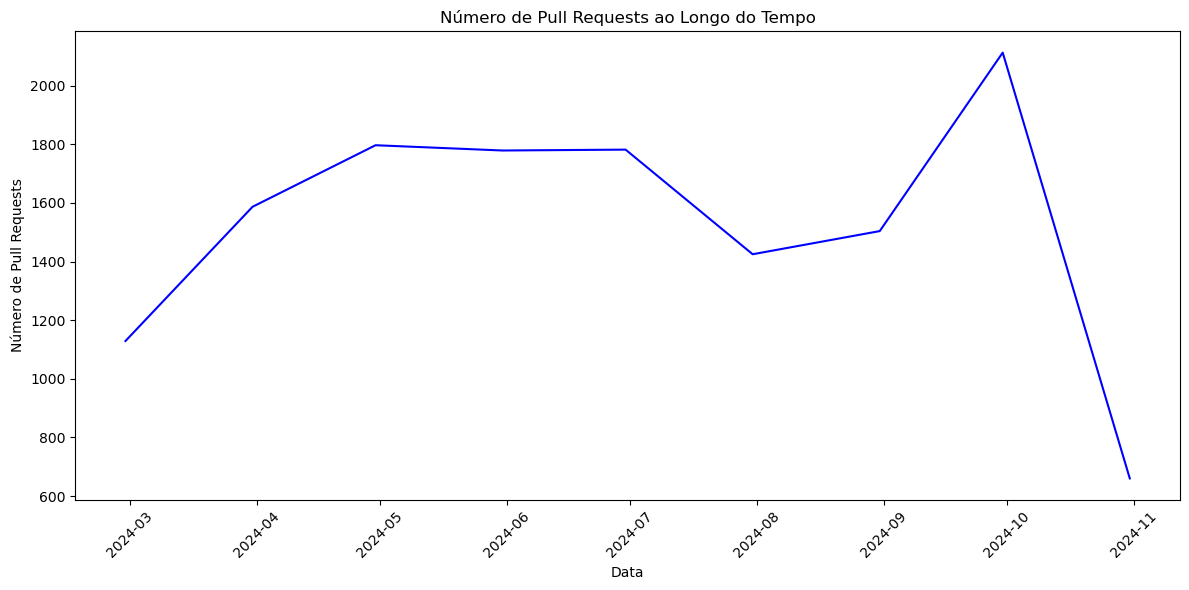

In [5]:
# Converter a coluna de data para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')

# Remover linhas onde a conversão falhou (se houver)
df_pr = df_pr.dropna(subset=['submitted_at'])

# Definir a coluna de data como índice
df_pr.set_index('submitted_at', inplace=True)

# Agrupar por mês e contar o número de pull requests
monthly_pull_requests = df_pr.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Pull Requests ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pull Requests')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [9]:
contagem_nomes_df = df_pr['author_login'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_login', 'frequencia']
print(contagem_nomes_df)


       author_login  frequencia
0         akien-mga        2172
1    AThousandShips        2059
2            KoBeWi        1419
3           Calinou         702
4           Mickeon         580
..              ...         ...
464      jamie-pate           1
465      tomfull123           1
466          bypie5           1
467           fstxz           1
468       mechalynx           1

[469 rows x 2 columns]


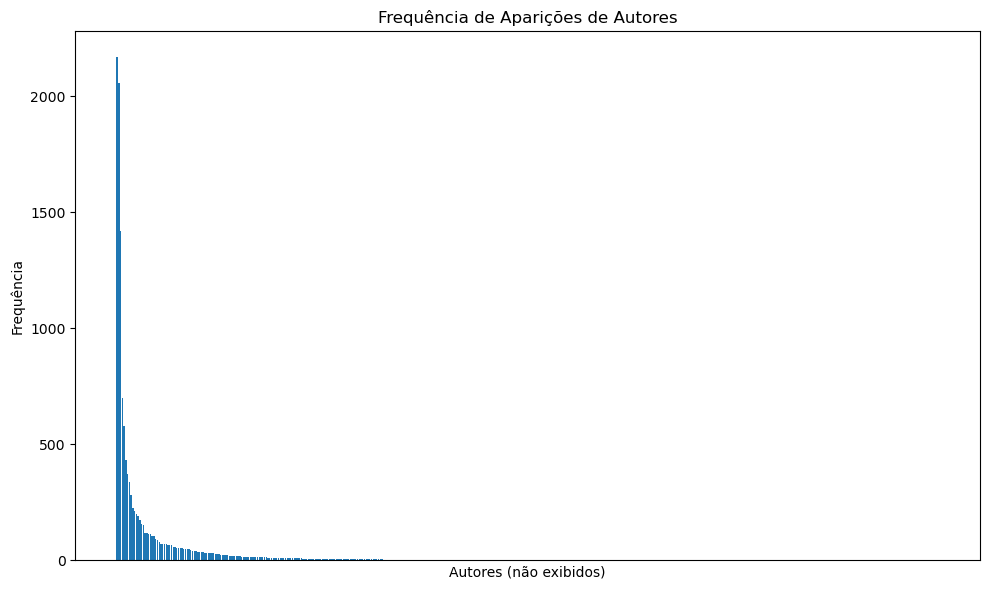

In [10]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_login'], contagem_nomes_df['frequencia'])

# Adicionar rótulos e título
plt.xlabel('Autores (não exibidos)')
plt.ylabel('Frequência')
plt.title('Frequência de Aparições de Autores')

# Remover os nomes do eixo X
plt.xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\Adriano\AppData\Local\Temp\ipykernel_25788\4225073825.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_pr['year_month'] = df_pr['submitted_at'].dt.to_period('M')


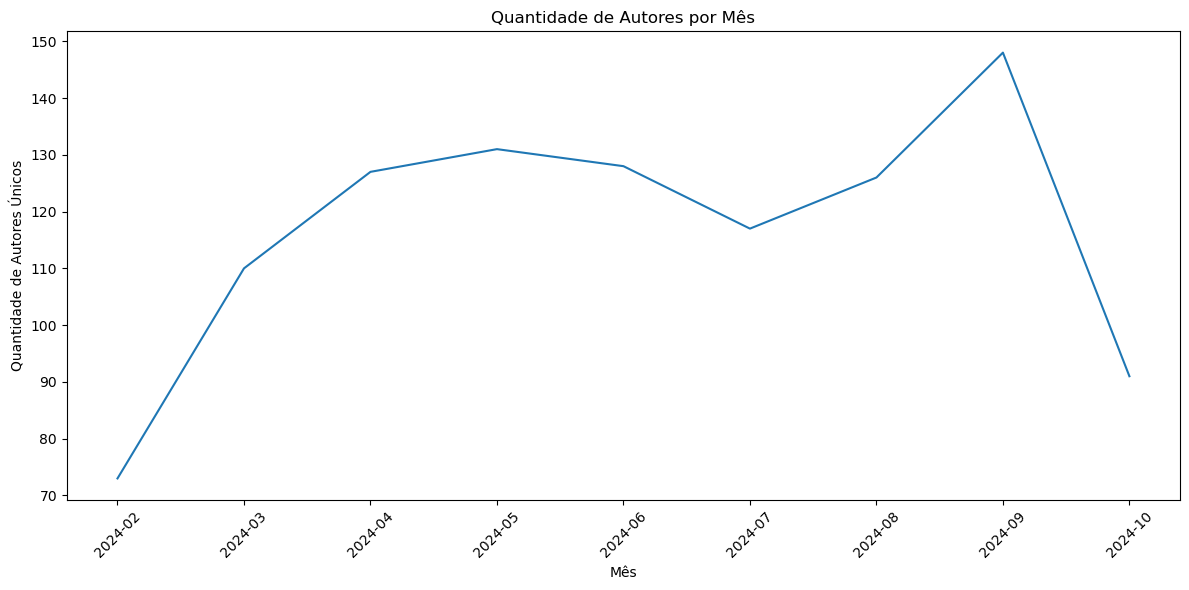

In [14]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano e o mês da coluna 'submitted_at'
df_pr['year_month'] = df_pr['submitted_at'].dt.to_period('M')

# Contar o número de autores únicos por mês
authors_per_month = df_pr.groupby('year_month')['author_login'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_month.index.astype(str), authors_per_month.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [15]:
contagem_nomes_df = df_pr['author_association'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_association', 'frequencia']
print(contagem_nomes_df)


  author_association  frequencia
0             MEMBER        9462
1        CONTRIBUTOR        3855
2               NONE         393
3       COLLABORATOR          66


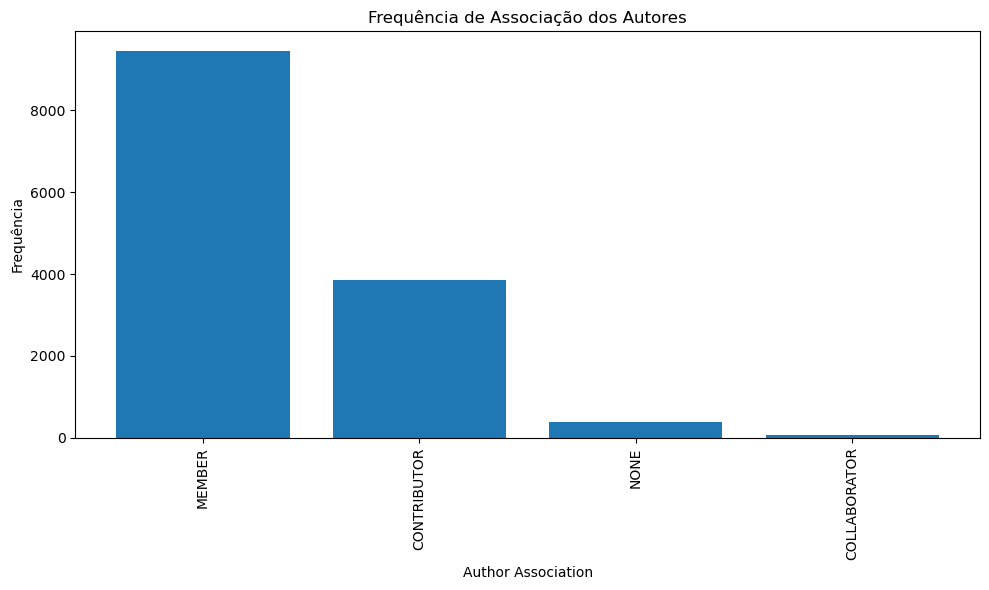

In [16]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_association'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('Author Association')
plt.ylabel('Frequência')
plt.title('Frequência de Associação dos Autores')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()

C:\Users\Adriano\AppData\Local\Temp\ipykernel_25788\91559393.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_pr['year_month'] = df_pr['submitted_at'].dt.to_period('M')


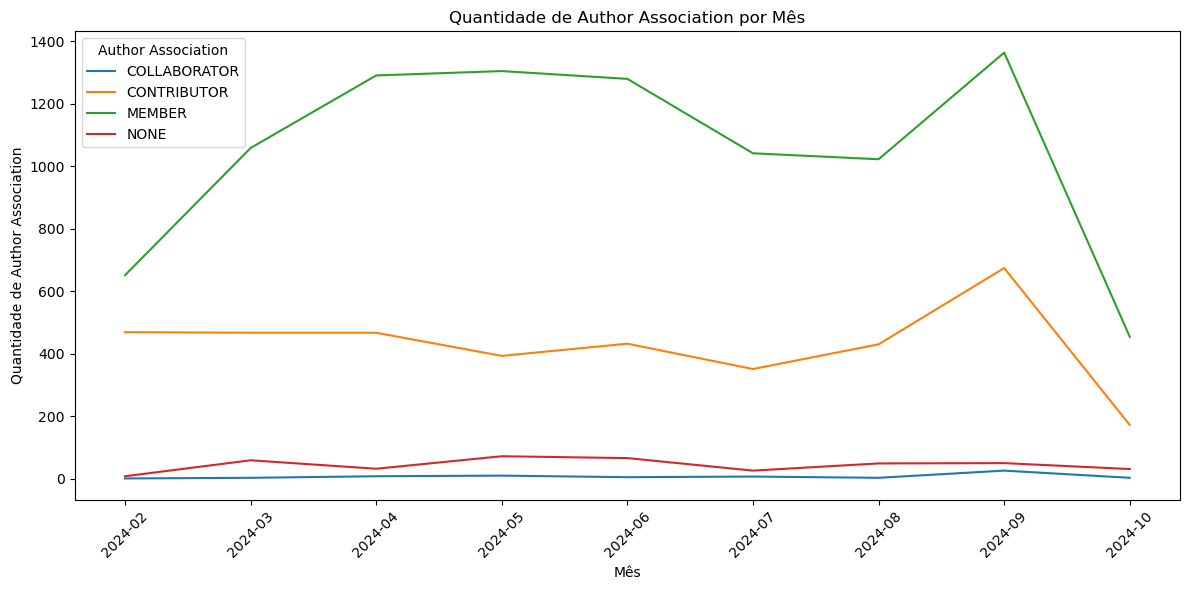

In [18]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano e o mês da coluna 'submitted_at'
df_pr['year_month'] = df_pr['submitted_at'].dt.to_period('M')

# Contar a quantidade de author_association únicos por ano e mês
association_counts = df_pr.groupby(['year_month', 'author_association']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for association in association_counts.columns:
    plt.plot(association_counts.index.astype(str), association_counts[association], marker='', linestyle='-', label=association)

plt.title('Quantidade de Author Association por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Author Association')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(False)
plt.legend(title='Author Association')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [19]:
contagem_nomes_df = df_pr['state'].value_counts().reset_index()
contagem_nomes_df.columns = ['state', 'frequencia']
print(contagem_nomes_df)


               state  frequencia
0          COMMENTED        8770
1           APPROVED        4697
2  CHANGES_REQUESTED         250
3          DISMISSED          59


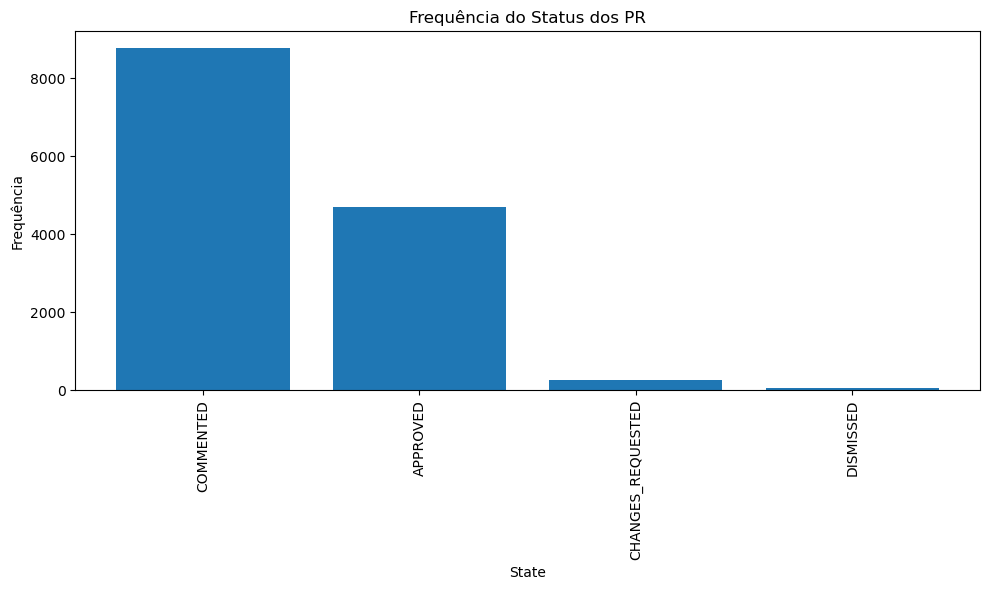

In [20]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['state'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('State')
plt.ylabel('Frequência')
plt.title('Frequência do Status dos PR')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\Adriano\AppData\Local\Temp\ipykernel_25788\1157972387.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_pr['year_month'] = df_pr['submitted_at'].dt.to_period('M')


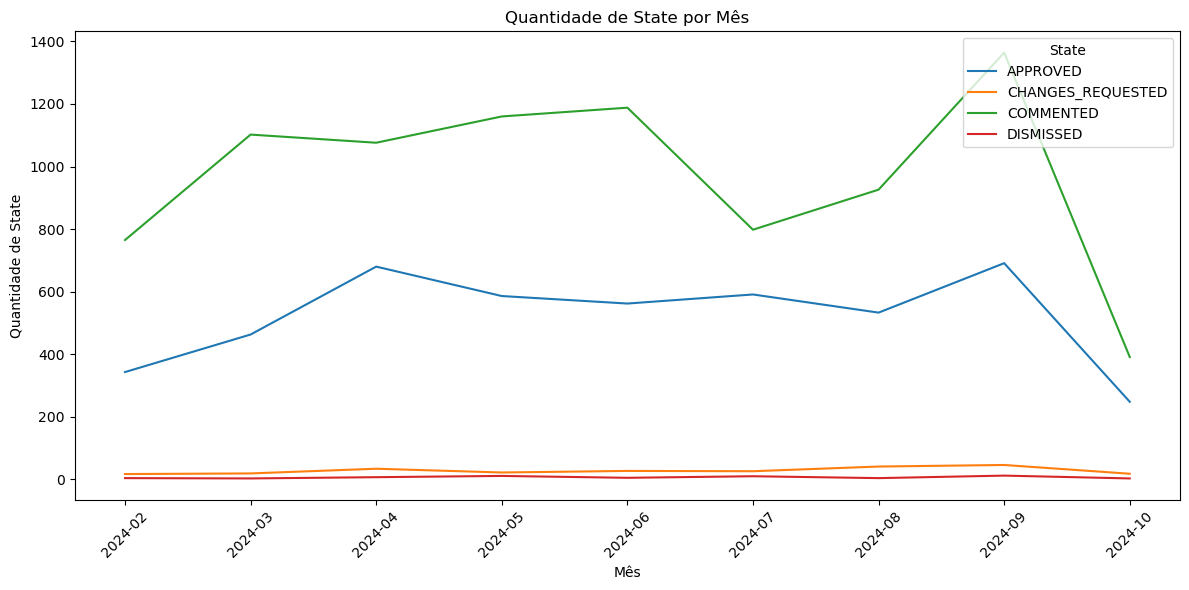

In [22]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano e o mês da coluna 'submitted_at'
df_pr['year_month'] = df_pr['submitted_at'].dt.to_period('M')

# Contar a quantidade de states por ano e mês
state_counts = df_pr.groupby(['year_month', 'state']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for state in state_counts.columns:
    plt.plot(state_counts.index.astype(str), state_counts[state], marker='', linestyle='-', label=state)

plt.title('Quantidade de State por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de State')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(False)
plt.legend(title='State')
plt.tight_layout()

# Exibir o gráfico
plt.show()